In [21]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D , Flatten , Dense
from keras.preprocessing.image import ImageDataGenerator

In [22]:
classifier =Sequential()

In [23]:
### Initializing the first layer
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation = 'relu'))

In [24]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [25]:
classifier.add(Flatten())

In [26]:
classifier.add(Dense(units= 128 , activation = 'relu'))
classifier.add(Dense(units=1,activation = 'sigmoid'))

In [27]:
classifier.compile(optimizer = 'adam',loss='binary_crossentropy',metrics = ['accuracy'])

In [28]:
train_data = ImageDataGenerator(rescale = 1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_data = ImageDataGenerator(rescale=1./255)

In [29]:
train = train_data.flow_from_directory('dataset/training_set',target_size=(64,64),batch_size = 32,class_mode='binary')
test = test_data.flow_from_directory('dataset/test_set',target_size=(64,64),batch_size=32,class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [30]:
classifier.fit_generator(train,steps_per_epoch=8000,epochs = 10,validation_data=test,validation_steps=2000)

Epoch 1/10
8000/8000 [==============================] - 1936s - loss: 0.4356 - acc: 0.7913 - val_loss: 0.5310 - val_acc: 0.7778
Epoch 2/10
8000/8000 [==============================] - 1929s - loss: 0.2701 - acc: 0.8848 - val_loss: 0.6870 - val_acc: 0.7772
Epoch 3/10
8000/8000 [==============================] - 1894s - loss: 0.1905 - acc: 0.9226 - val_loss: 0.7944 - val_acc: 0.7652
Epoch 4/10
8000/8000 [==============================] - 1908s - loss: 0.1441 - acc: 0.9433 - val_loss: 0.8944 - val_acc: 0.7751
Epoch 5/10
8000/8000 [==============================] - 1896s - loss: 0.1117 - acc: 0.9578 - val_loss: 1.0171 - val_acc: 0.7666
Epoch 6/10
8000/8000 [==============================] - 1931s - loss: 0.0912 - acc: 0.9665 - val_loss: 1.1009 - val_acc: 0.7782
Epoch 7/10
8000/8000 [==============================] - 1921s - loss: 0.0773 - acc: 0.9721 - val_loss: 1.1708 - val_acc: 0.7754
Epoch 8/10
8000/8000 [==============================] - 1978s - loss: 0.0659 - acc: 0.9763 - val_loss: 1

In [31]:
import numpy as np
from keras.preprocessing import image

In [32]:
imagetest = image.load_img('image1.jpg',target_size=(64,64))

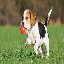

In [33]:
imagetest

In [34]:
### Dog ###

In [36]:
### adding image as array
imagetest = image.img_to_array(imagetest)
## added as 3d array 

In [38]:
#Modify to 1d array 
imagetest = np.expand_dims(imagetest,axis = 0)

In [41]:
train.class_indices

{'cats': 0, 'dogs': 1}

In [44]:
if result[0][0]==1:
    prediction = 'dog'
else :
    prediction =='cat'

In [45]:
result = classifier.predict(imagetest)

In [46]:
prediction

'dog'